# Wyszukiwanie wzorców dwuwymiarowych

In [139]:
from timeit import timeit

In [47]:
class TrieNode:
    def __init__(self, char, id):
        self.children = {}
        self.parent = None
        self.is_end = False
        self.char = char
        self.link = self
        self.id = id

    def add_child(self, child):
        self.children[child.char] = child
        child.parent = self

    def get_child(self, char):
        return self.children[char]

class Trie:
    def __init__(self, strings):
        self.root = TrieNode('', 0)
        self.size = 1
        self.__build(strings)

    def __build(self, strings):
        for s in strings:
            self.__insert_string(s)

        q = [self.root]
        while q:
            node = q.pop(0)
            if node.char == '' or node.parent.char == '':
                node.link = self.root
            else:
                c = node.char
                curr = node.parent.link

                while True:
                    if c in curr.children:
                        node.link = curr.children[c]
                        break
                    if curr.char == '':
                        node.link = self.root
                        break

                    curr = curr.link
            
            for char in node.children:
                q.append(node.children[char])


    def __insert_string(self, str):
        curr = self.root

        for char in str:
            if char not in curr.children:
                n = TrieNode(char, self.size)
                self.size = self.size + 1
                curr.add_child(n)
                curr = n
            else:
                curr = curr.get_child(char)

In [141]:
def get_next_state(curr_node, char):
    while True:
        if char in curr_node.children:
            return curr_node.children[char]

        if curr_node.char == '':
            return curr_node #root

        curr_node = curr_node.link

def find_pattern(pattern, mat, trie = None):
    cols = []
    for c in range(len(pattern[0])):
        s = []
        for r in range(len(pattern)):
            s.append(pattern[r][c])
        cols.append(s)

    if not trie:
        trie = Trie(cols)
        
    states = [[0] * len(mat[0]) for i in range(len(mat))]
    acc = []

    for c in range(len(pattern[0])):
        curr_node = trie.root
        for r in range(len(pattern)):
            curr_node = get_next_state(curr_node, pattern[r][c])
        acc.append(curr_node.id)

    for c in range(len(mat[0])):
        curr_node = trie.root
        for r in range(len(mat)):
            curr_node = get_next_state(curr_node, mat[r][c])
            states[r][c] = curr_node.id

    matches = []

    for r in range(len(mat)):
        for c in range(len(mat[0])):
            match = True
            for i in range(len(acc)):
                if states[r][c + i] != acc[i]:
                    match = False
                    break
            if match:
                matches.append((r - len(pattern) + 1, c))

    return matches

In [55]:
def preprocess_file(file_name):
    with open(file_name, 'r') as file:
        data = file.read().split('\n')
        max_len = max(map(lambda line: len(line), data))
        return list(map(lambda line: line + (' ' * (max_len - len(line))), data))

In [56]:
lines = preprocess_file('haystack.txt')

## Ten sam znak na kolejnych liniach

In [137]:
letters = set(" ".join(lines))
letters.remove(' ')

In [142]:
for letter in letters:
    print(f"{letter}: {find_pattern([[letter], [letter]], lines)}")

U: []
;: []
a: [(0, 82), (3, 30), (5, 60), (6, 63), (20, 6), (28, 69), (31, 50), (31, 73), (33, 66), (37, 4), (52, 12), (53, 12), (53, 48), (56, 11), (57, 36), (58, 36), (59, 24), (64, 2), (64, 14), (64, 22), (65, 35), (69, 35), (76, 21), (76, 74), (77, 42), (77, 61), (78, 59), (79, 37)]
j: []
m: [(16, 5), (28, 70), (34, 40), (34, 60), (44, 0)]
s: [(3, 57), (3, 63), (4, 49), (8, 21), (9, 58), (28, 45), (29, 56), (30, 56), (37, 34), (40, 63), (45, 34), (46, 44), (49, 14), (52, 53), (54, 0), (67, 37), (70, 41), (71, 24), (79, 24)]
q: []
P: []
3: []
N: []
e: [(0, 63), (1, 8), (4, 77), (7, 65), (10, 1), (10, 64), (14, 2), (15, 43), (17, 6), (18, 27), (20, 10), (21, 61), (22, 53), (24, 3), (24, 65), (28, 67), (28, 73), (29, 38), (29, 43), (37, 48), (40, 11), (40, 26), (41, 57), (42, 36), (42, 48), (46, 52), (47, 50), (51, 31), (57, 54), (58, 50), (58, 54), (59, 73), (63, 66), (65, 69), (66, 72), (67, 17), (68, 46), (69, 15), (70, 49), (71, 38), (72, 23), (73, 27), (76, 6), (77, 6), (78, 65)

## "th" i "t h"

In [57]:
find_pattern(["th", "th"], lines)

[]

In [58]:
find_pattern(["t h", "t h"], lines)

[(37, 0)]

## Rozpoznywanie znaków na obrazie

Uzyskane rezultaty nie są idealne, wynikają ze subtelnych różnic w wyświetlaniu tych samych znaków na obrazie. Próbowałem zrobić jakiś prosty preprocessing, np. zmiana wszystkich pixeli niebiałych na czarne, ale nie poprawiło to znacząco jakości wyników.

In [62]:
from skimage import io
from skimage.color import rgb2gray

In [68]:
image = rgb2gray(io.imread("haystack.png"))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.


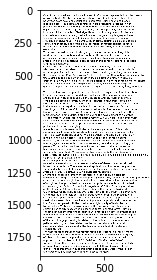

In [69]:
io.imshow(image)

In [87]:
def find_in_image(letter, image):
    coords = find_pattern(letter.tolist(), image.tolist())
    print(f"Found {len(coords)} chars")

    sample = coords[2]
    io.imshow(image[sample[0]:sample[0] + letter.shape[0], sample[1]:sample[1] + letter.shape[1]])

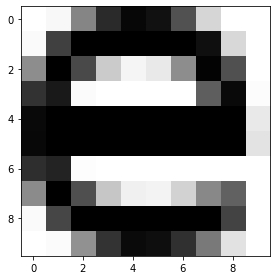

In [84]:
letter1 = image[81:91, 37:47]
io.imshow(letter1)

Found 576 chars


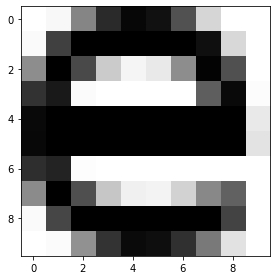

In [180]:
find_in_image(letter1, image)

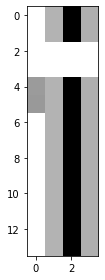

In [94]:
letter2 = image[55:69, 70:74]
io.imshow(letter2)

Found 33 chars


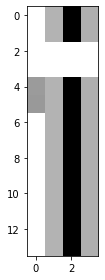

In [95]:
find_in_image(letter2, image)

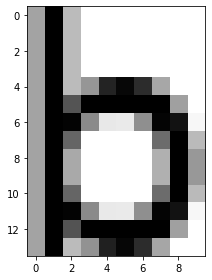

In [107]:
letter3 = image[77:91, 26:36]
io.imshow(letter3)

Found 56 chars


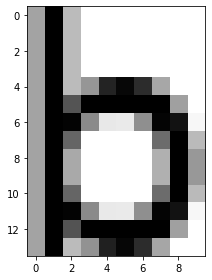

In [108]:
find_in_image(letter3, image)

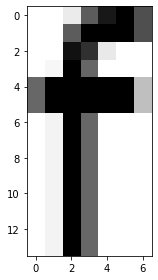

In [121]:
letter4 = image[33:47, 78:85]
io.imshow(letter4)

Found 88 chars


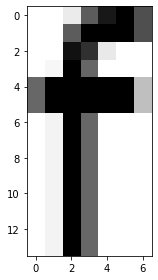

In [122]:
find_in_image(letter4, image)

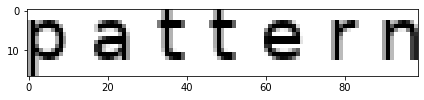

In [128]:
pattern_image = image[474:491, 184:283]
io.imshow(pattern_image)

Found 5 chars


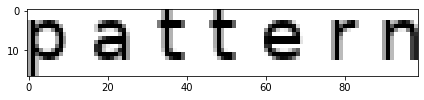

In [129]:
find_in_image(pattern_image, image)

## Porównanie czasu budowania automatu

In [167]:
def measure_build_time(pattern):
    def func_to_time():
        Trie(pattern)
    
    print(f"Trie construction time: {timeit(func_to_time, number = 1)} seconds")

In [169]:
measure_build_time(["algorytmy", "tekstowe"])

Trie construction time: 0.00015198900655377656 seconds


In [170]:
measure_build_time(letter1.tolist())

Trie construction time: 0.0006176169990794733 seconds


In [172]:
measure_build_time(pattern_image.tolist())

Trie construction time: 0.011619349999818951 seconds


In [175]:
measure_build_time(image[:1000, :800].tolist())

Trie construction time: 1.1986658509995323 seconds


In [176]:
measure_build_time(image[:1850, :850].tolist())

Trie construction time: 2.660236927011283 seconds


## Porównanie czasu wyszukiwania wzorca

In [219]:
def build_trie_from_cols(pattern):
    cols = []
    for c in range(len(pattern[0])):
        s = []
        for r in range(len(pattern)):
            s.append(pattern[r][c])
        cols.append(s)
        
    return Trie(cols)

def measure_search_time(pattern, text):
    trie = build_trie_from_cols(pattern)
    
    def func_to_time():
        find_pattern(pattern, text, trie)
        
    print(f"Search time: {timeit(func_to_time, number = 1)} seconds")

In [220]:
measure_search_time(letter1.tolist(), image.tolist())

Search time: 1.500197887988179 seconds


In [221]:
measure_search_time(pattern_image.tolist(), image.tolist())

Search time: 1.4872162730025593 seconds


In [223]:
measure_search_time(image[100:1000, 100:800].tolist(), image.tolist())

Search time: 1.790625159002957 seconds


## Pocięcie obrazu i porównanie czasu wyszukiwania

In [229]:
def split_and_time(n, pattern, image):
    dy = image.shape[0] / n
    images = []
    for i in range(n):
        images.append(image[int(i * dy) : int((i + 1) * dy), :])
        
    trie = build_trie_from_cols(pattern.tolist())
    
    for image in images:
        def func_to_time():
            find_pattern(pattern.tolist(), image.tolist(), trie)
        
        print(f"One part: {timeit(func_to_time, number = 1)} seconds")

In [230]:
split_and_time(2, letter1, image)

One part: 0.7665770500025246 seconds
One part: 0.7461403789930046 seconds


In [231]:
split_and_time(4, letter1, image)

One part: 0.396603169006994 seconds
One part: 0.36339037999277934 seconds
One part: 0.3584790460008662 seconds
One part: 0.3842182639928069 seconds


In [232]:
split_and_time(8, letter1, image)

One part: 0.22688274999381974 seconds
One part: 0.1700789500027895 seconds
One part: 0.1886551000061445 seconds
One part: 0.18471876801049802 seconds
One part: 0.18989499300369062 seconds
One part: 0.1922228290059138 seconds
One part: 0.20528136599750724 seconds
One part: 0.19027403299696743 seconds
